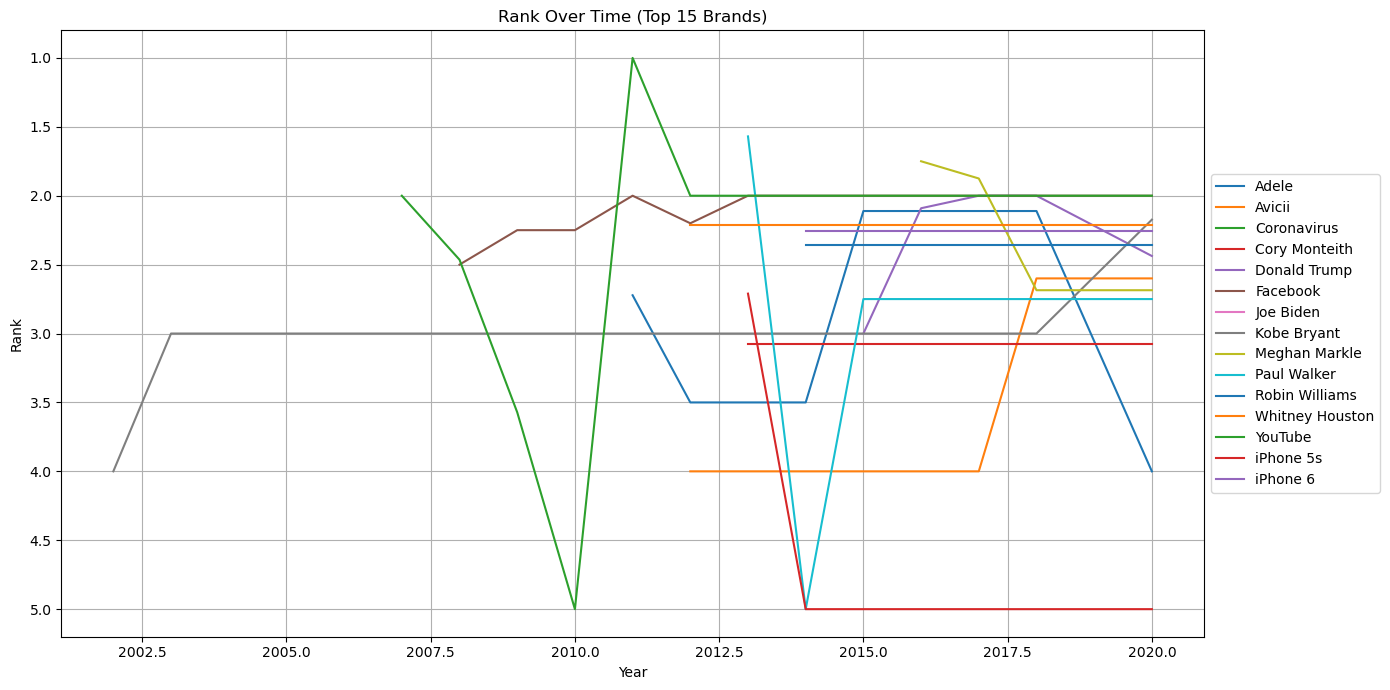

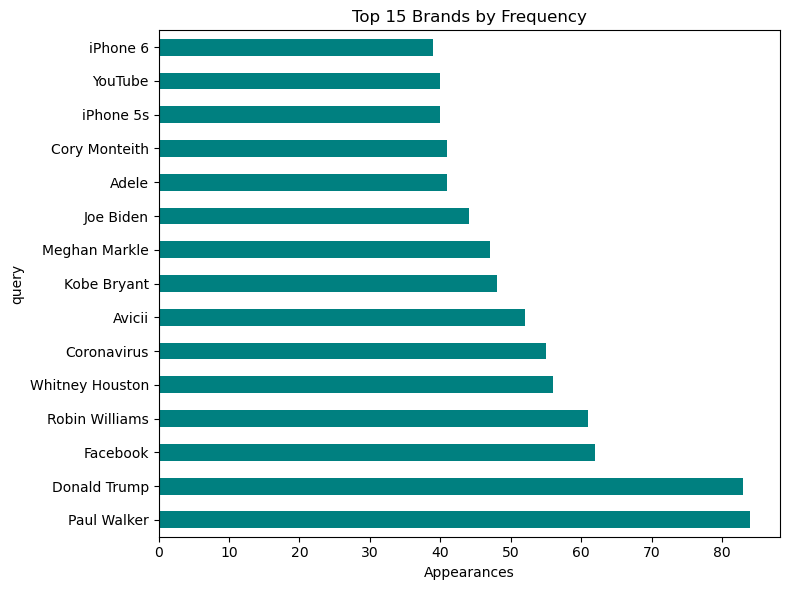

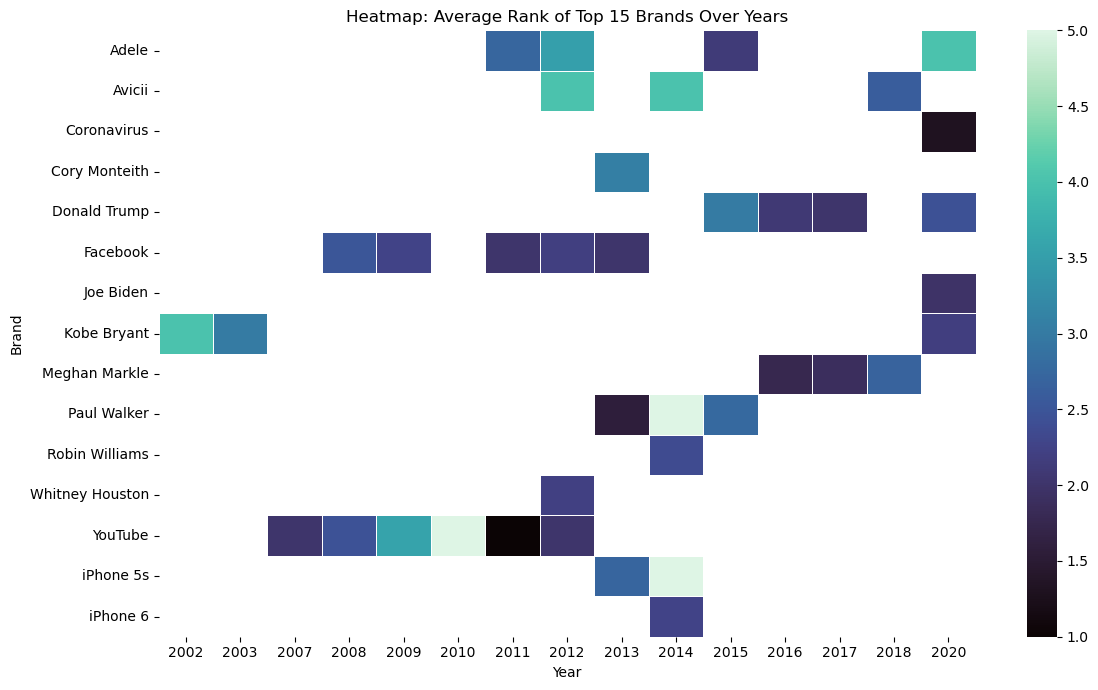

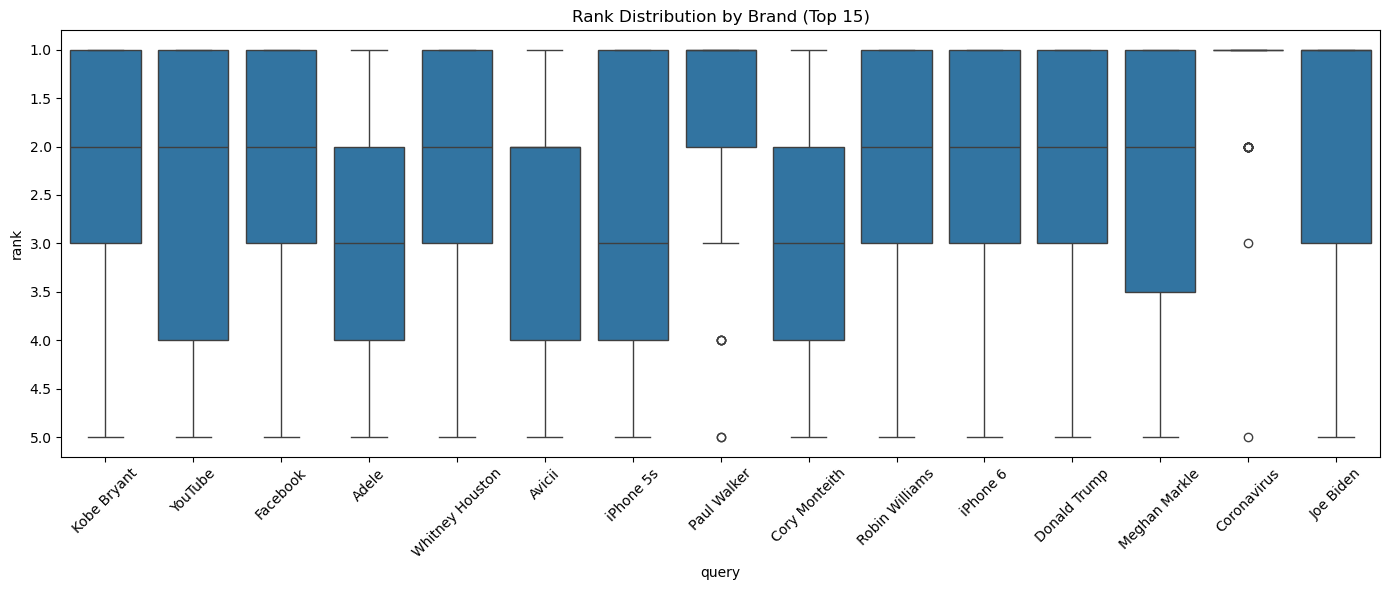

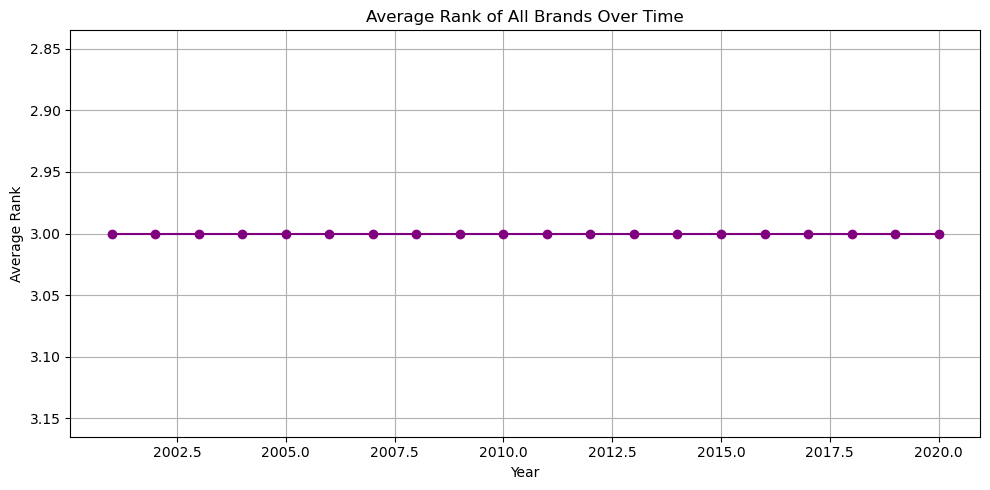

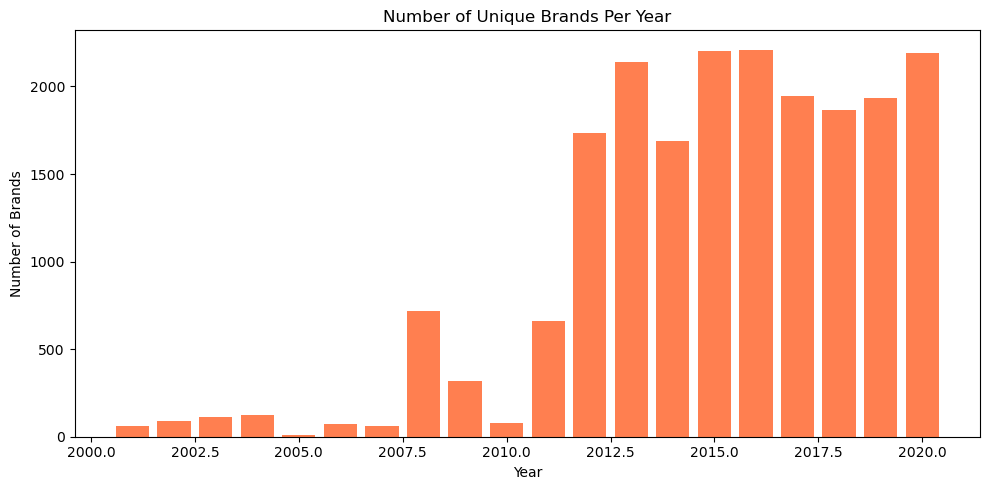

22:20:27 - cmdstanpy - INFO - Chain [1] start processing
22:20:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Rakshitha\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



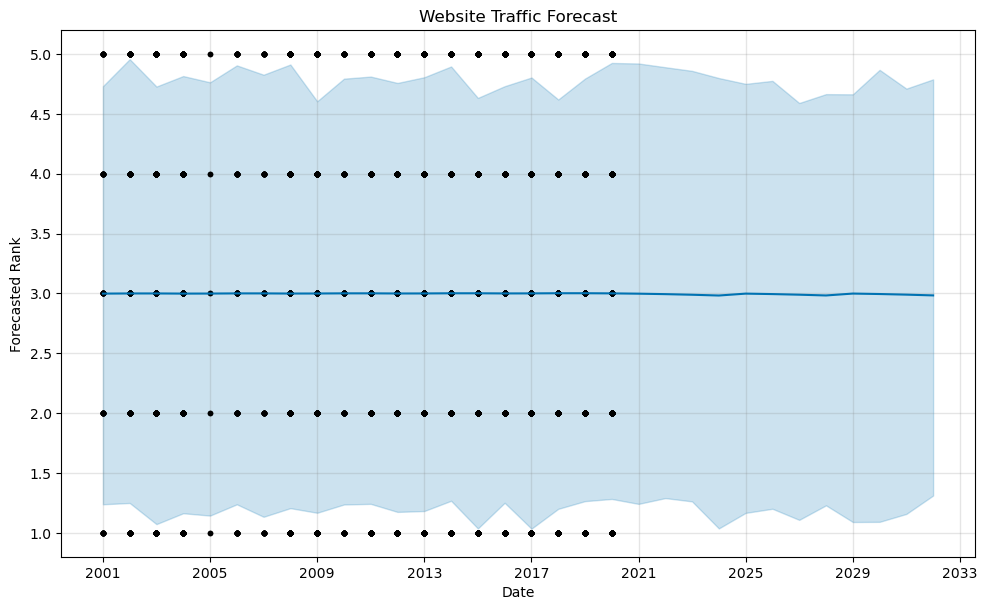

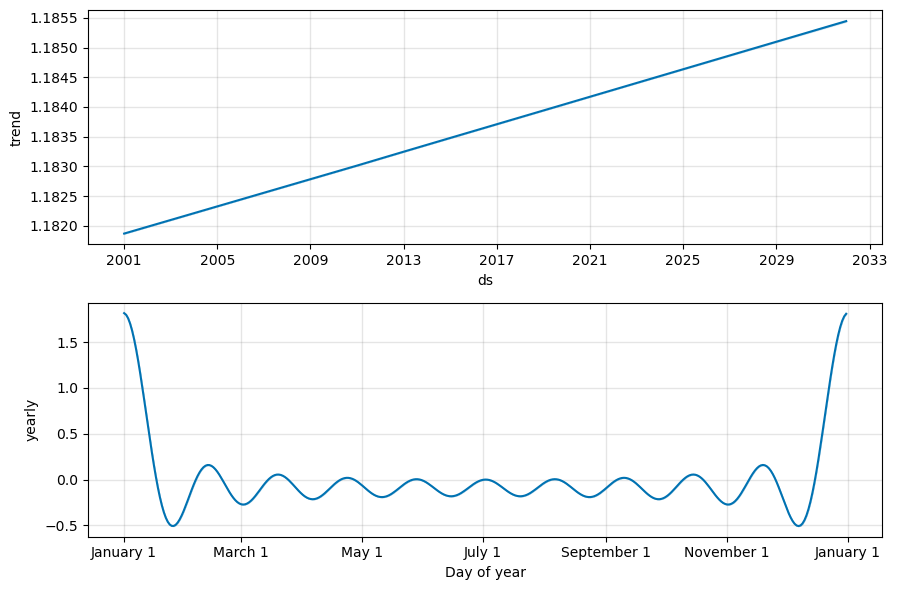

           ds      yhat  yhat_lower  yhat_upper
20 2020-12-31  2.997325    1.241264    4.920247
21 2021-12-31  2.993490    1.289669    4.889125
22 2022-12-31  2.988372    1.262202    4.858659
23 2023-12-31  2.981977    1.036159    4.798665
24 2024-12-31  2.997788    1.166265    4.750127
25 2025-12-31  2.993953    1.200499    4.775018
26 2026-12-31  2.988834    1.107729    4.590226
27 2027-12-31  2.982439    1.229013    4.664267
28 2028-12-31  2.998251    1.089838    4.662742
29 2029-12-31  2.994415    1.091297    4.867103
30 2030-12-31  2.989297    1.157323    4.710363
31 2031-12-31  2.982902    1.311021    4.787656


  0%|          | 0/33 [00:00<?, ?it/s]

22:20:33 - cmdstanpy - INFO - Chain [1] start processing
22:20:33 - cmdstanpy - INFO - Chain [1] done processing
22:20:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:20:33 - cmdstanpy - INFO - Chain [1] start processing
22:20:34 - cmdstanpy - INFO - Chain [1] done processing
22:20:34 - cmdstanpy - INFO - Chain [1] start processing
22:20:34 - cmdstanpy - INFO - Chain [1] done processing
22:20:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:20:34 - cmdstanpy - INFO - Chain [1] start processing
22:20:34 - cmdstanpy - INFO - Chain [1] done processing
22:20:35 - cmdstanpy - INFO - Chain [1] start processing
22:20:35 - cmdstanpy - INFO - Chain [1] done processing
22:20:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

   horizon      rmse      mape
0 149 days  1.414214  0.630051
1 154 days  1.414215  0.630479
2 159 days  1.414216  0.630765
3 164 days  1.414214  0.630325
4 170 days  1.414214  0.629980


In [1]:
# --- Install necessary packages ---
# Run these in your terminal or Colab cell
# pip install pytrends plotly pandas prophet --upgrade cmdstanpy

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from pytrends.request import TrendReq
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

pio.renderers.default = 'browser'

# --- Load and Clean Dataset ---
df = pd.read_csv(r"C:\rakshitha\2nd year\archive (1)\trends.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['year'] = df['year'].astype(int)

# --- Top 15 Brands ---
top_brands = df['query'].value_counts().head(15).index
df_top = df[df['query'].isin(top_brands)]

# --- Pivot Table for Trend Line ---
df_pivot = df_top.pivot_table(index='year', columns='query', values='rank', aggfunc='mean')
df_pivot = df_pivot.ffill()

# --- Line Plot: Rank Over Time ---
plt.figure(figsize=(14, 7))
for brand in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[brand], label=brand)
plt.gca().invert_yaxis()
plt.title('Rank Over Time (Top 15 Brands)')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Top Brands by Frequency ---
plt.figure(figsize=(8, 6))
df['query'].value_counts().head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Brands by Frequency')
plt.xlabel('Appearances')
plt.tight_layout()
plt.show()

# --- Heatmap: Average Rank by Year ---
heatmap_data = df_top.pivot_table(index='query', columns='year', values='rank', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='mako', linewidths=0.5)
plt.title('Heatmap: Average Rank of Top 15 Brands Over Years')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# --- Boxplot: Rank Distribution by Brand ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='query', y='rank')
plt.title('Rank Distribution by Brand (Top 15)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Average Rank of All Brands Over Time ---
avg_rank_all = df.groupby('year')['rank'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_rank_all.index, avg_rank_all.values, marker='o', color='purple')
plt.title('Average Rank of All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Unique Brands Per Year ---
brands_per_year = df.groupby('year')['query'].nunique()
plt.figure(figsize=(10, 5))
plt.bar(brands_per_year.index, brands_per_year.values, color='coral')
plt.title('Number of Unique Brands Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Brands')
plt.tight_layout()
plt.show()

# --- Interactive Line Plot: Top Brands ---
fig = px.line(df_top, x='year', y='rank', color='query',
              title='Interactive Line Plot - Top 15 Brands')
fig.update_yaxes(autorange='reversed')
fig.update_layout(height=600)
fig.show()

# --- Interactive Pie Chart ---
brand_counts = df['query'].value_counts().head(15).reset_index()
brand_counts.columns = ['Brand', 'Frequency']
fig_pie = px.pie(brand_counts, names='Brand', values='Frequency',
                 title='Top 15 Brands - Frequency Distribution',
                 hole=0.3)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

# --- Prepare Data for Prophet ---
df_prophet = df[['year', 'rank']].copy()
df_prophet.rename(columns={'year': 'ds', 'rank': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
df_prophet['y'] = df_prophet['y'].astype(float)

# --- Prophet Model ---
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
model.fit(df_prophet)

# --- Forecast Future Traffic ---
future = model.make_future_dataframe(periods=12, freq='Y')
forecast = model.predict(future)

# --- Plot Forecast ---
model.plot(forecast)
plt.title('Website Traffic Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Rank')
plt.show()

# --- Forecast Components ---
model.plot_components(forecast)
plt.show()

# --- View Forecast Output ---
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

# --- Cross-validation and Evaluation ---
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'rmse', 'mape']].head())


In [5]:
pip install tensorflow pandas numpy matplotlib seaborn plotly scikit-learn prophet


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 1.8/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 3.1/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 4.2/376.0 MB 5.5 MB/s eta 0:01:08
    --------------------------------------- 5.5/376.0 MB 5.6 MB/s eta 0:01:07
    --------------------------------------- 7.1/376.0 MB 5.9 MB/s eta 0:01:03
    --------------------------------------- 8.7/376.0 MB 6.0 MB/s eta 0:01:01
   - -------------------------------------- 10.0/376.0 MB 6.1 MB/s eta 0:01:01
   - -------------------------------------- 11.8/376.0 MB 6.4 MB/s eta 0:00:58
   - -------------------------------------- 13.6/376.0 MB 6.5 MB/s eta 0:00:56
   - -------------------------------------- 15.5/376.0 MB 6.7 MB/s eta 0:00:54
   - -------------------------------------- 17.3/376.0 MB 6.9 MB/s 

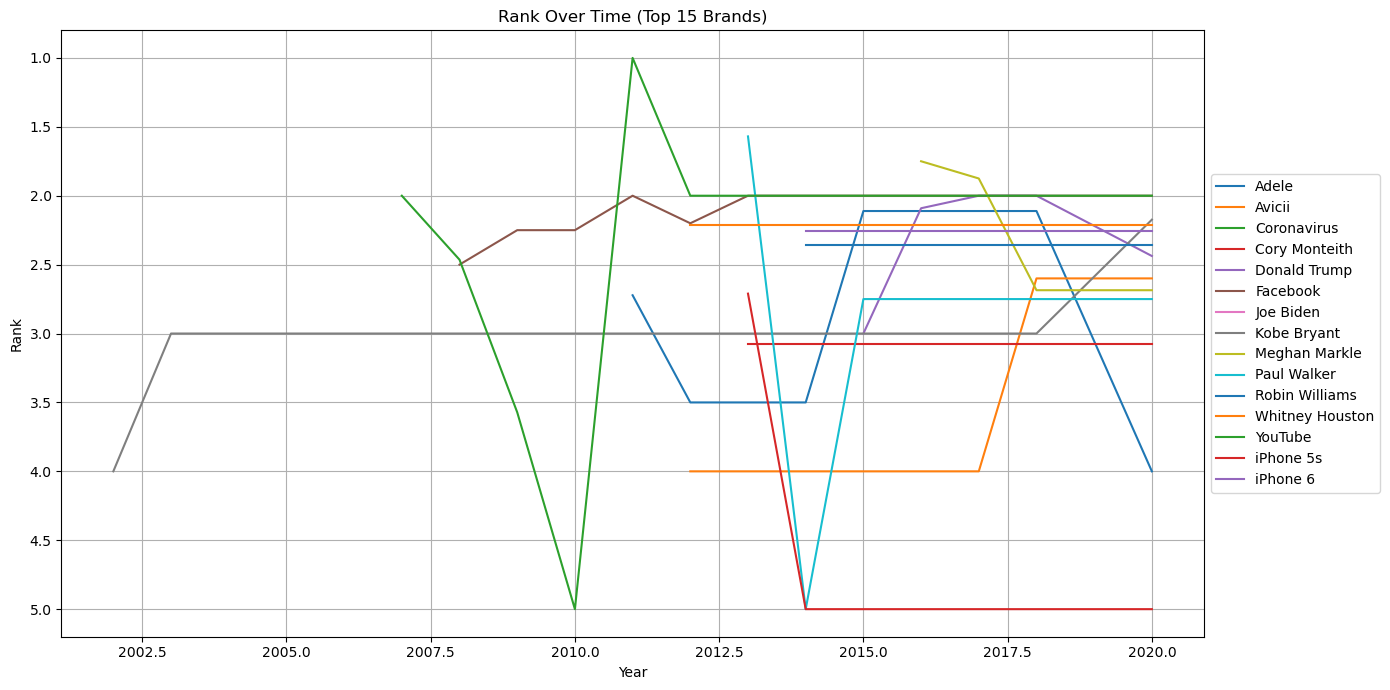

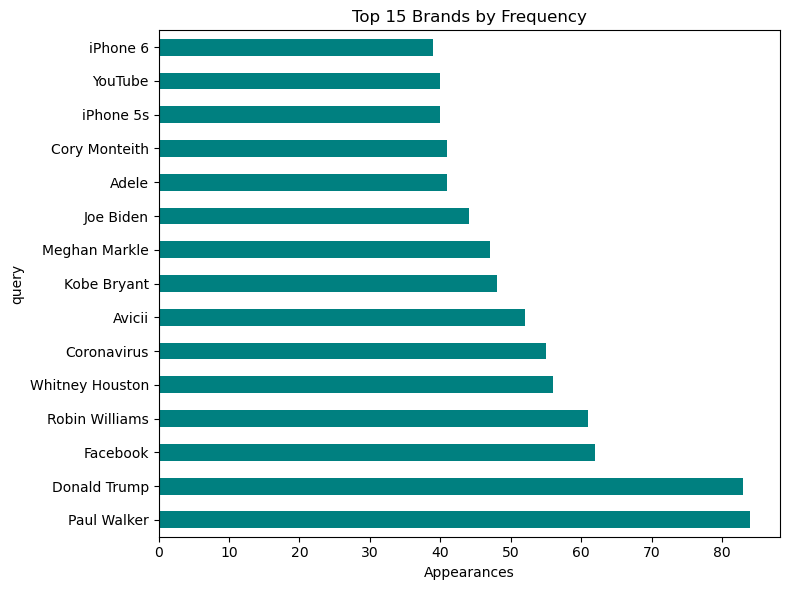

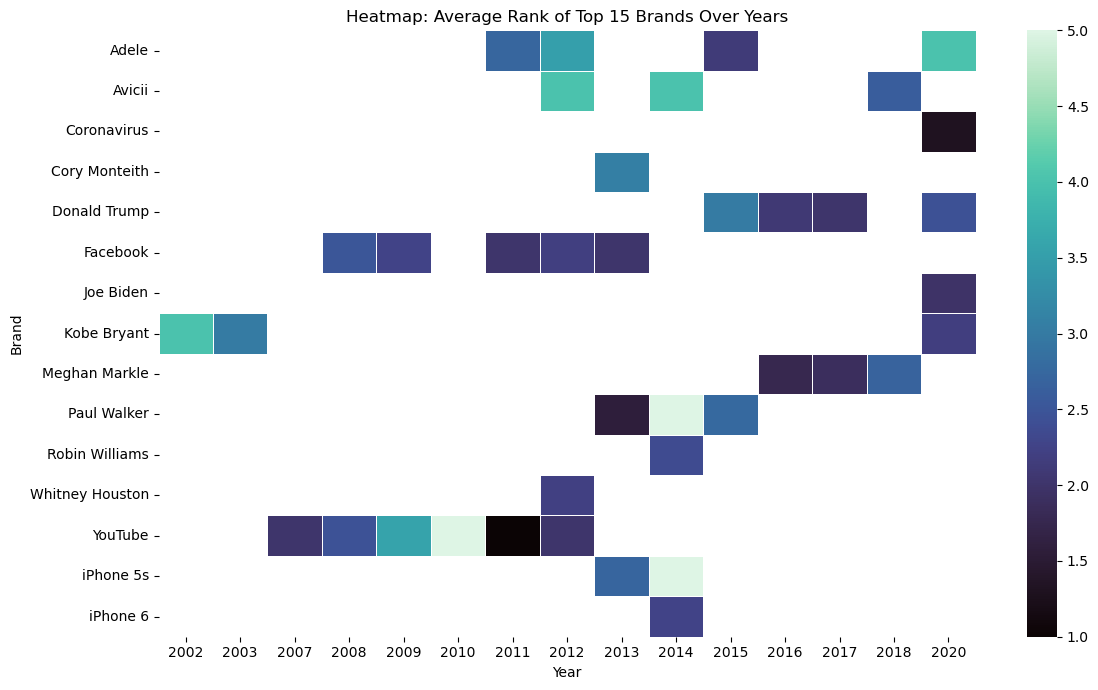

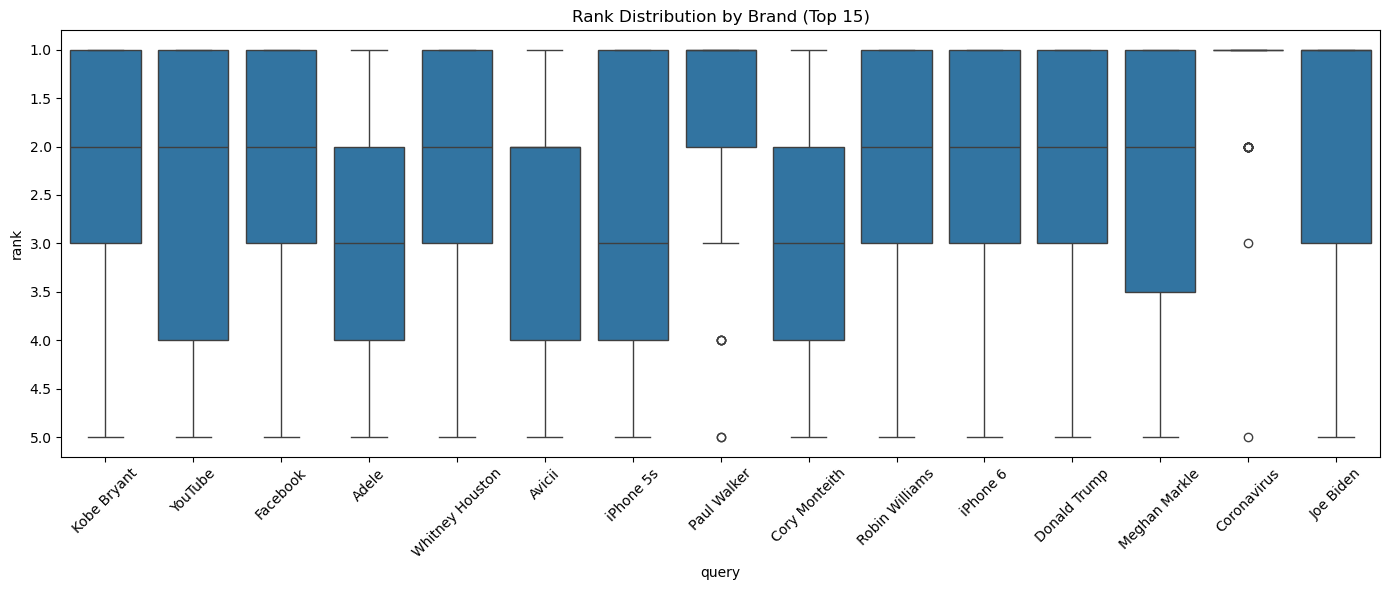

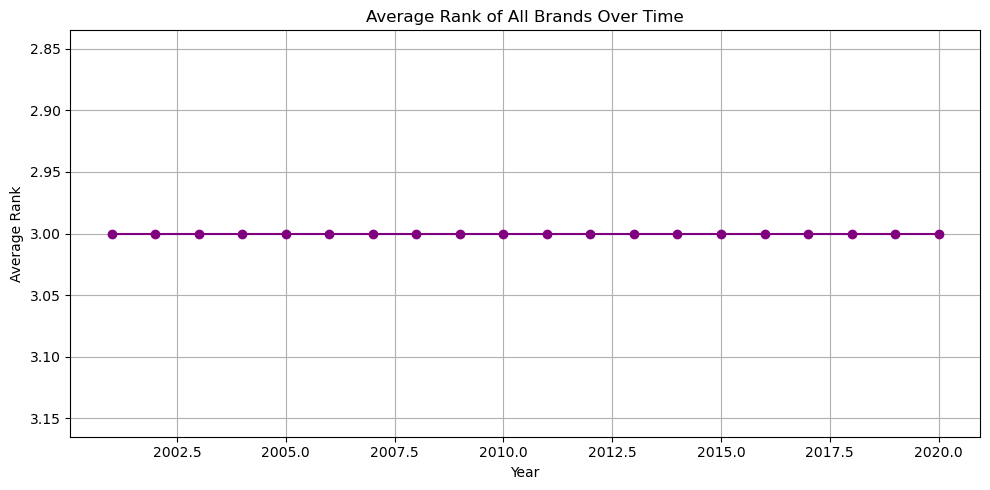

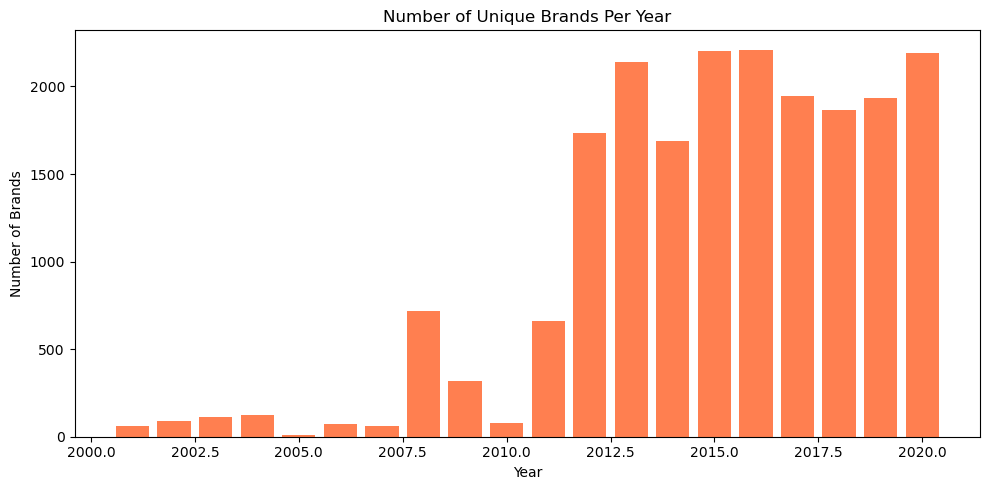

22:44:34 - cmdstanpy - INFO - Chain [1] start processing
22:44:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Rakshitha\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



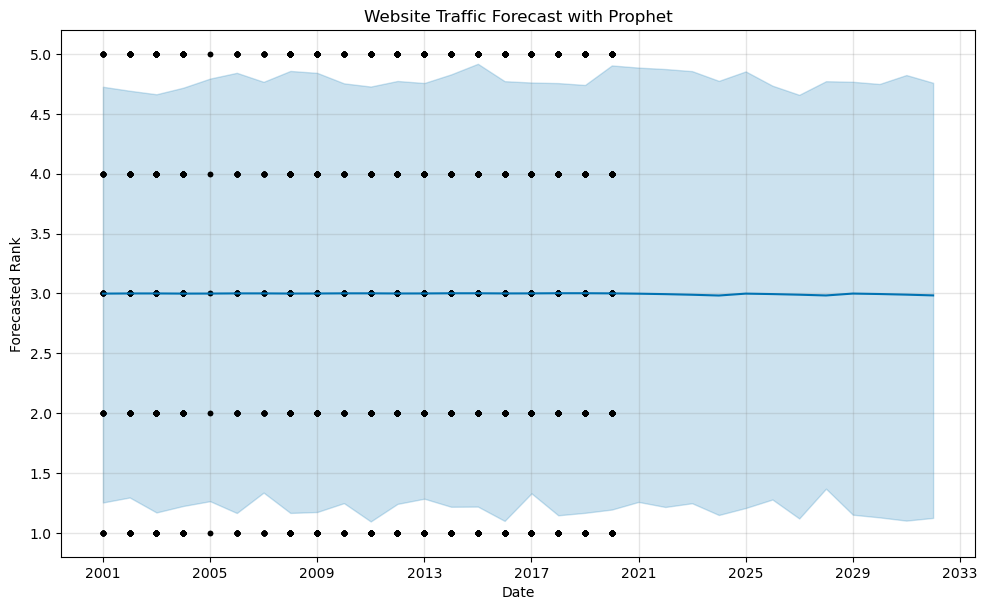

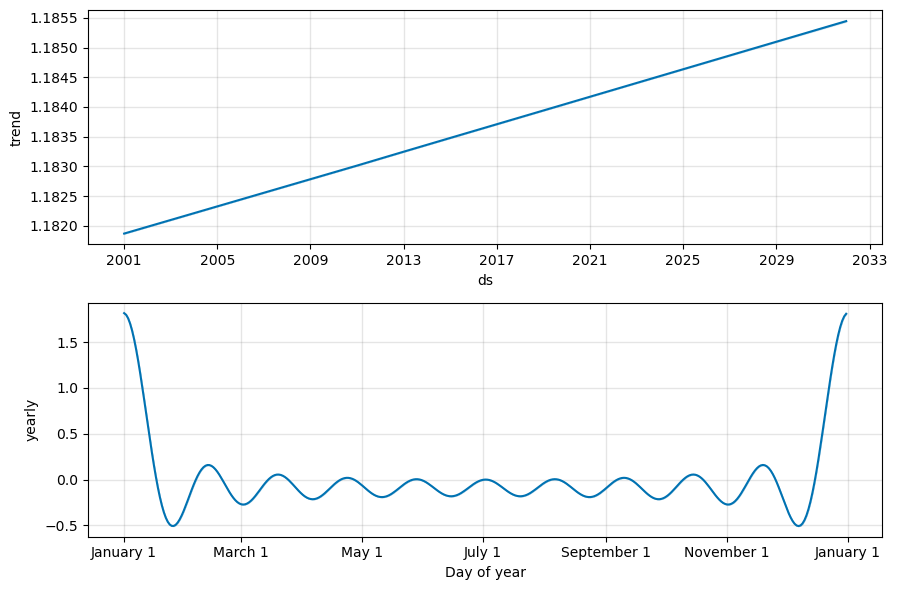

           ds      yhat  yhat_lower  yhat_upper
20 2020-12-31  2.997325    1.257637    4.885833
21 2021-12-31  2.993490    1.215410    4.873955
22 2022-12-31  2.988372    1.246698    4.856472
23 2023-12-31  2.981977    1.148599    4.775082
24 2024-12-31  2.997788    1.206877    4.854071
25 2025-12-31  2.993953    1.277848    4.734667
26 2026-12-31  2.988834    1.119409    4.658472
27 2027-12-31  2.982439    1.368204    4.772208
28 2028-12-31  2.998251    1.150847    4.767318
29 2029-12-31  2.994415    1.128452    4.749167
30 2030-12-31  2.989297    1.101601    4.823706
31 2031-12-31  2.982902    1.124168    4.759027


  0%|          | 0/33 [00:00<?, ?it/s]

22:44:41 - cmdstanpy - INFO - Chain [1] start processing
22:44:42 - cmdstanpy - INFO - Chain [1] done processing
22:44:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:44:42 - cmdstanpy - INFO - Chain [1] start processing
22:44:42 - cmdstanpy - INFO - Chain [1] done processing
22:44:42 - cmdstanpy - INFO - Chain [1] start processing
22:44:42 - cmdstanpy - INFO - Chain [1] done processing
22:44:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:44:43 - cmdstanpy - INFO - Chain [1] start processing
22:44:43 - cmdstanpy - INFO - Chain [1] done processing
22:44:43 - cmdstanpy - INFO - Chain [1] start processing
22:44:43 - cmdstanpy - INFO - Chain [1] done processing
22:44:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

   horizon      rmse      mape
0 149 days  1.414214  0.630051
1 154 days  1.414215  0.630479
2 159 days  1.414216  0.630765
3 164 days  1.414214  0.630325
4 170 days  1.414214  0.629980


C:\Users\Rakshitha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 0.0672
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0033
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0025
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0019
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0016
Epoch 6/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0014
Epoch 7/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0012
Epoch 8/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0011
Epoch 9/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0010
Epoch 10/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 9.6821e-04
Epoch 11/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 9.0338e-04
Epoch 12/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 9.0329e-04
Epoch 13/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 8.5078e-04
Epoch 14/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 8.8765e-04
Epoch 15/

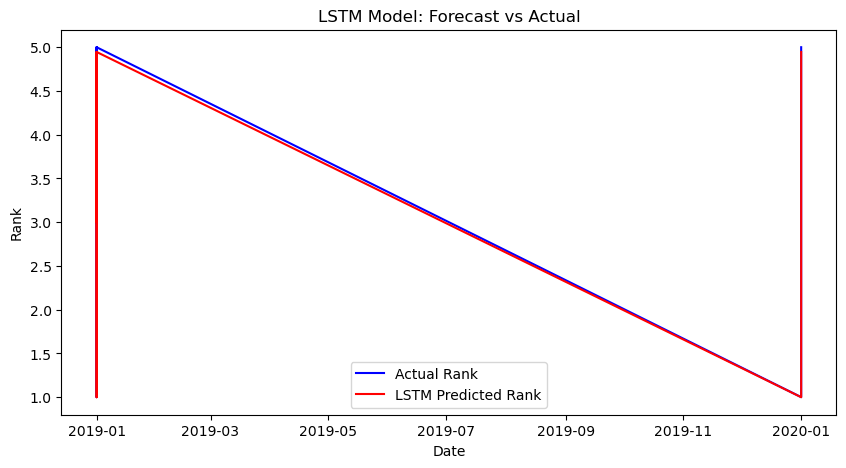

LSTM Mean Squared Error: 0.0009277485780570821


In [8]:
# --- Install necessary packages ---
# Run these in your terminal or Colab cell
# pip install pytrends plotly pandas prophet tensorflow scikit-learn --upgrade cmdstanpy

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from pytrends.request import TrendReq
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Set plot renderer to browser
pio.renderers.default = 'browser'

# --- Load and Clean Dataset ---
df = pd.read_csv(r"C:\rakshitha\2nd year\archive (1)\trends.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['year'] = df['year'].astype(int)

# --- Top 15 Brands ---
top_brands = df['query'].value_counts().head(15).index
df_top = df[df['query'].isin(top_brands)]

# --- Pivot Table for Trend Line ---
df_pivot = df_top.pivot_table(index='year', columns='query', values='rank', aggfunc='mean')
df_pivot = df_pivot.ffill()

# --- Line Plot: Rank Over Time ---
plt.figure(figsize=(14, 7))
for brand in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[brand], label=brand)
plt.gca().invert_yaxis()
plt.title('Rank Over Time (Top 15 Brands)')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Top Brands by Frequency ---
plt.figure(figsize=(8, 6))
df['query'].value_counts().head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Brands by Frequency')
plt.xlabel('Appearances')
plt.tight_layout()
plt.show()

# --- Heatmap: Average Rank by Year ---
heatmap_data = df_top.pivot_table(index='query', columns='year', values='rank', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='mako', linewidths=0.5)
plt.title('Heatmap: Average Rank of Top 15 Brands Over Years')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# --- Boxplot: Rank Distribution by Brand ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='query', y='rank')
plt.title('Rank Distribution by Brand (Top 15)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Average Rank of All Brands Over Time ---
avg_rank_all = df.groupby('year')['rank'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_rank_all.index, avg_rank_all.values, marker='o', color='purple')
plt.title('Average Rank of All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Unique Brands Per Year ---
brands_per_year = df.groupby('year')['query'].nunique()
plt.figure(figsize=(10, 5))
plt.bar(brands_per_year.index, brands_per_year.values, color='coral')
plt.title('Number of Unique Brands Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Brands')
plt.tight_layout()
plt.show()

# --- Interactive Line Plot: Top Brands ---
fig = px.line(df_top, x='year', y='rank', color='query',
              title='Interactive Line Plot - Top 15 Brands')
fig.update_yaxes(autorange='reversed')
fig.update_layout(height=600)
fig.show()

# --- Interactive Pie Chart ---
brand_counts = df['query'].value_counts().head(15).reset_index()
brand_counts.columns = ['Brand', 'Frequency']
fig_pie = px.pie(brand_counts, names='Brand', values='Frequency',
                 title='Top 15 Brands - Frequency Distribution',
                 hole=0.3)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

# --- Prepare Data for Prophet ---
df_prophet = df[['year', 'rank']].copy()
df_prophet.rename(columns={'year': 'ds', 'rank': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
df_prophet['y'] = df_prophet['y'].astype(float)

# --- Prophet Model ---
model_prophet = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
model_prophet.fit(df_prophet)

# --- Forecast Future Traffic with Prophet ---
future = model_prophet.make_future_dataframe(periods=12, freq='Y')
forecast = model_prophet.predict(future)

# --- Plot Forecast Prophet ---
model_prophet.plot(forecast)
plt.title('Website Traffic Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Forecasted Rank')
plt.show()

# --- Forecast Components Prophet ---
model_prophet.plot_components(forecast)
plt.show()

# --- View Forecast Output Prophet ---
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

# --- Cross-validation and Evaluation (Prophet) ---
df_cv = cross_validation(model_prophet, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'rmse', 'mape']].head())

# --- Prepare Data for LSTM ---
df_lstm = df[['year', 'rank']].copy()
df_lstm['year'] = pd.to_datetime(df_lstm['year'], format='%Y')
df_lstm.set_index('year', inplace=True)

# --- Scaling the data for LSTM ---
scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_scaled = scaler.fit_transform(df_lstm)

# --- Creating Sequences for LSTM ---
def create_lstm_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 5
X_lstm, y_lstm = create_lstm_sequences(df_lstm_scaled, time_step)

# --- Reshape X_lstm for LSTM input ---
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# --- Train-Test Split for LSTM ---
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# --- LSTM Model ---
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# --- Compile and Fit LSTM Model ---
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

# --- Make Predictions with LSTM ---
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# --- Plot LSTM Forecast vs Actual ---
plt.figure(figsize=(10, 5))
plt.plot(df_lstm.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual Rank')
plt.plot(df_lstm.index[-len(predictions_lstm):], predictions_lstm, color='red', label='LSTM Predicted Rank')
plt.title('LSTM Model: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.legend()
plt.show()

# --- LSTM Model Evaluation ---
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions_lstm)
print(f'LSTM Mean Squared Error: {mse_lstm}')
